In [35]:
import networkx as nx
import random as rn
import numpy as np
import matplotlib.pyplot as plt
import pickle
from colorsys import hsv_to_rgb
%matplotlib inline

Model implementation with NN influence group + Monte Carlo.

In [55]:
def act(G, graph, degree, spin, p, q):
    independent = rn.random() < p
    if independent:
        random = rn.random() < 0.5
        if random:
            graph[spin] = -graph[spin]
    else:
        degree_spin = degree[spin] >= q
        if degree_spin:
            nghbrs = rn.sample(G[spin].keys(), q)
            first = graph[nghbrs[0]]
            for n in range(1,len(nghbrs)):
                if graph[nghbrs[n]] != first:
                    return
            graph[spin] = first

def magnetization(graph, p, q, N, M):
    runs = []
    graph_new = {}
    degree_graph = {}
    for v in graph.nodes():
        graph_new[v] = 1
        degree_graph[v] = graph.degree(v)
    l = int(graph.number_of_nodes())
    for i in range(M):
        res = []
        for j in range(N):
            nodes = list(graph.nodes())
            random_choice = rn.choices(nodes, k = l)#,weights=None,cum_weights=None,k=n)
            for spin in random_choice:
                act(graph, graph_new, degree_graph, spin, p, q)
            res.append(sum(graph_new.values())/l)
        runs.append(res)
        for v in graph.nodes():
            graph_new[v] = 1
    return [sum(time)/M for time in zip(*runs)]

In [76]:
N = 100 #agents
q = [3,4]
p = np.arange(0.0, 0.52, 0.02)
#Networks used as the underlying topoology of social interactions:
Complete_graph = nx.nx.complete_graph(100)
Barabasi_Albert = nx.random_graphs.barabasi_albert_graph(100, 4)
Watts_Strogatz1 = nx.random_graphs.watts_strogatz_graph(100, 4, 0.01)
Watts_Strogatz2 = nx.random_graphs.watts_strogatz_graph(100, 4, 0.2)
graph = [Complete_graph, Barabasi_Albert, Watts_Strogatz1, Watts_Strogatz2]

Time evolution of the magnetization for the WS(100,4,0.01) network - single run.

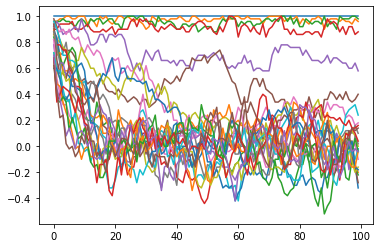

In [78]:
results_1 = {}
for p_step in p:
    for q_step in q:
        results_1[(p_step, q_step)] = magnetization(Watts_Strogatz1, p_step, q_step, N=100, M=1)

#q=3
for p_step in p:
    plt.plot(results_1[p_step,3])

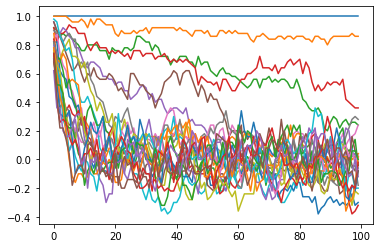

In [79]:
#q=4
for p_step in p:
    plt.plot(results_1[p_step,4])

Averaged time evolution of the magnetization for the $WS(100,4,0.01)$ network with $q=[3,4]$.

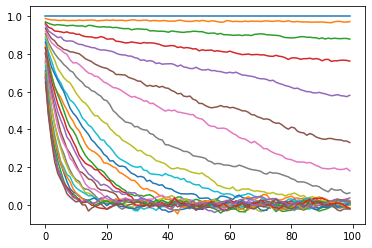

In [85]:
results = {}
for p_step in p:
    for q_step in q:
        results[(p_step, q_step)] = magnetization(Watts_Strogatz1, p_step, q_step, N=100, M=100)
#q=3
for p_ step in p:
    plt.plot(results[p_step,3])

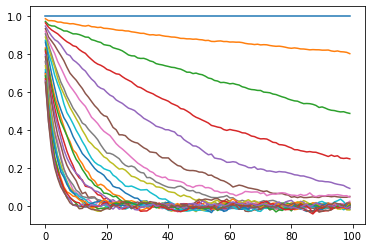

In [87]:
#q=4
for p_step in p:
    plt.plot(results[p_step,4])

Averaged evolution of the magnetization in $p$.

In [89]:
all_res = {}
for p_step in p:
    for q_step in q:
        for g in range(4):
            G = graph[g]
            all_res[(g, p_step, q_step)] = magnetization(G, p_step, q_step, N=100, M=1000)

KeyboardInterrupt: 

I was ploting Monte Carlo simulation for 1000 steps, but ufortenately i couldnt obtain results. Below simulation for 100 steps.

In [90]:
all_res = {}
for p_step in p:
    for q_step in q:
        for g in range(4):
            G = graph[g]
            all_res[(g, p_step, q_step)] = magnetization(G, p_step, q_step, N=100, M=100)

In [95]:
final = {}
for g in range(4):
    for q in [3, 4]:
        final[(g, q)] = [all_res[(g, p_step, q)][-1] for p_step in p]

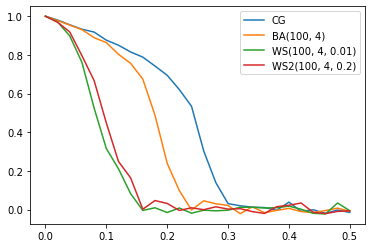

In [101]:
#q=3
labels=["CG",'BA(100, 4)','WS(100, 4, 0.01)','WS2(100, 4, 0.2)']
for g in range(4):
    plt.plot(p, final[(g, 3)], label=labels[g])
plt.legend()
plt.show()

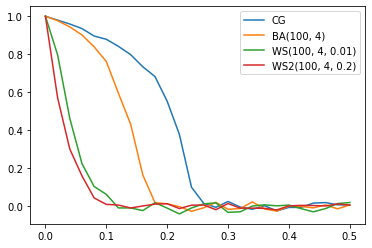

In [102]:
#q=4
labels=["CG",'BA(100, 4)','WS(100, 4, 0.01)','WS2(100, 4, 0.2)']
for g in range(4):
    plt.plot(p, final[(g, 4)], label=labels[g])
plt.legend()
plt.show()

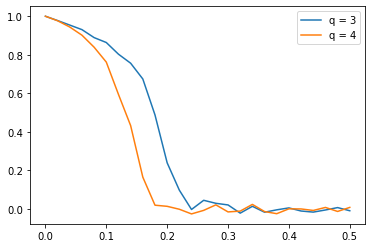

In [103]:
for q in [3, 4]:
    plt.plot(p, final[(1, q)], label='q = '+str(q))
plt.legend()
plt.show()